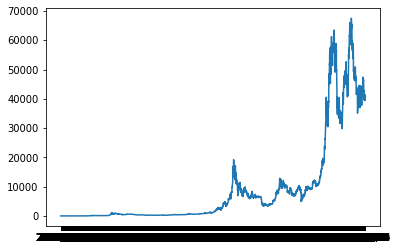

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as  np
#from statsmodels.tsa.seasonal import seasonal_decompose


stockPrice = pd.read_csv('./bit.csv')

plt.plot(stockPrice['Time'], stockPrice['Price'])
plt.show()



In [2]:
def generatePartPrice():
    dateparse = lambda dates: pd.datetime.strptime(dates, '%Y/%m/%d')
    stockPrice = pd.read_csv('./bit.csv', parse_dates=['Time'],
                               index_col='Time', date_parser=dateparse)
    stockPriceSeries = pd.Series(stockPrice["Price"])
    
    (stockPrice["Price"]) =  ((stockPrice["Price"].values))
    stockPriceSeries = pd.Series(stockPrice["Price"])  #log
    
    
    stockPartPrice = stockPriceSeries['2013-9-30':'2021-3-18']
    stockPartPrice2 = stockPriceSeries['2020-10-28':'2022-4-24']
    stockPartPrice.to_csv('./stockPartPrice.csv', header=True)
    stockPartPrice2.to_csv('./stockPartPrice2.csv', header=True)
    
    
generatePartPrice()






/Users/saber/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


/Users/saber/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:11: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  # This is added back by InteractiveShellApp.init_path()


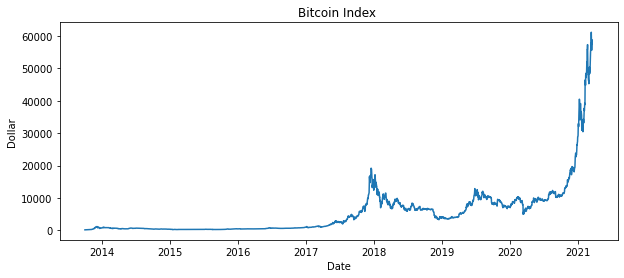

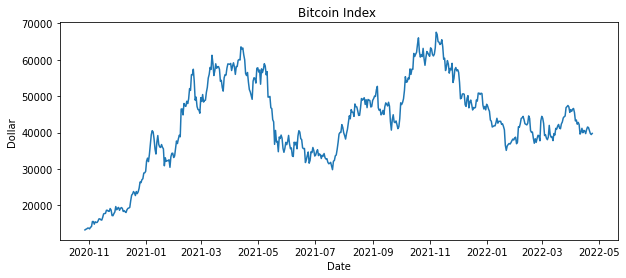

Time
2013-09-30      123.1
2013-10-01      125.5
2013-10-02       99.8
2013-10-03      116.8
2013-10-04      121.3
               ...   
2021-03-14    59005.0
2021-03-15    55644.0
2021-03-16    56924.0
2021-03-17    58870.0
2021-03-18    57640.0
Name: Price, Length: 2723, dtype: float64


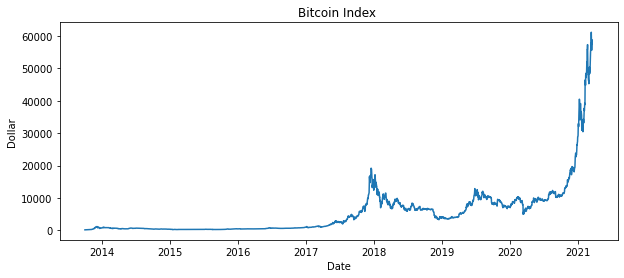

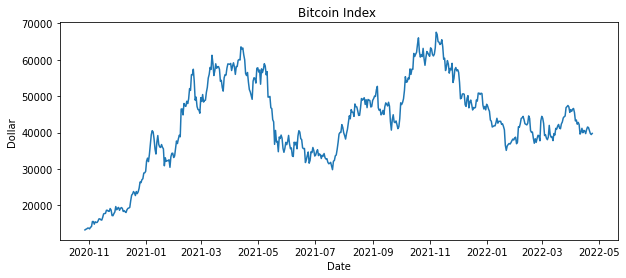

In [3]:
def partPriceDisplay(timeseries):
    graph = plt.figure(figsize=(10, 4))
    ax = graph.add_subplot(111)
    ax.set(title='Bitcoin Index ',
           ylabel='Dollar', xlabel='Date')
   
    plt.plot(timeseries)
    plt.show()
    

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
partPrice1 = pd.read_csv('./stockPartPrice.csv', parse_dates=['Time'],
                                 index_col='Time', date_parser=dateparse)
partPrice2 = pd.read_csv('./stockPartPrice2.csv', parse_dates=['Time'],
                                 index_col='Time', date_parser=dateparse)
partPriceDisplay(partPrice1["Price"])
partPriceDisplay(partPrice2["Price"])

print(partPrice1["Price"])

partPriceDisplay(partPrice1["Price"])
partPriceDisplay(partPrice2["Price"])





In [4]:
# traing 和 test set

def generateStockSet():
    dateparse = lambda dates: pd.datetime.strptime(dates, '%Y/%m/%d')
    stockPrice = pd.read_csv('./bit.csv', parse_dates=['Time'],
                               index_col='Time', date_parser=dateparse)

    stockPriceTrain =stockPrice['2020-10-26':'2021-10-26']
    stockPriceTest = stockPrice['2021-10-26':'2021-11-4']

    stockPriceTrain.to_csv('./stockPriceTrain.csv', header=True)
    stockPriceTest.to_csv('./stockPriceTest.csv', header=True)
    print(stockPriceTrain)
    

generateStockSet()

              Price
Time               
2020-10-26  13061.0
2020-10-27  13626.3
2020-10-28  13272.0
2020-10-29  13451.0
2020-10-30  13568.0
...             ...
2021-10-22  60708.0
2021-10-23  61302.0
2021-10-24  60847.0
2021-10-25  63100.0
2021-10-26  60290.0

[366 rows x 1 columns]


/Users/saber/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


/Users/saber/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:31: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


timeseries_adf :  (-1.6760350019702053, 0.44350033046869003, 0, 365, {'1%': -3.4483935212959844, '5%': -2.8694912343676497, '10%': -2.571005879151811}, 6212.815866433472)
timeseries_diff1_adf :  (-20.339847303653983, 0.0, 0, 365, {'1%': -3.4483935212959844, '5%': -2.8694912343676497, '10%': -2.571005879151811}, 6214.246906971463)
timeseries_diff2_adf :  (-8.683776403356205, 4.21682706859897e-14, 12, 353, {'1%': -3.4490114443793214, '5%': -2.8697627072503757, '10%': -2.5711506161673716}, 6249.343316298668)


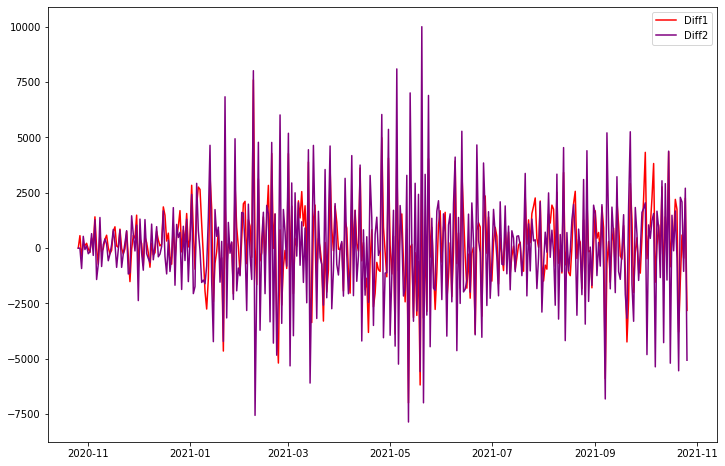

In [5]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller as ADF
#ADF test：


def diff(timeseries):
    timeseries_diff1 = timeseries.diff(1)
    timeseries_diff2 = timeseries_diff1.diff(1)

    timeseries_diff1 = timeseries_diff1.fillna(0)
    timeseries_diff2 = timeseries_diff2.fillna(0)

    timeseries_adf = ADF(timeseries['Price'].tolist())
    timeseries_diff1_adf = ADF(timeseries_diff1['Price'].tolist())
    timeseries_diff2_adf = ADF(timeseries_diff2['Price'].tolist())

    print('timeseries_adf : ', timeseries_adf)
    print('timeseries_diff1_adf : ', timeseries_diff1_adf)
    print('timeseries_diff2_adf : ', timeseries_diff2_adf)

    plt.figure(figsize=(12, 8))
    #plt.plot(timeseries, label='Original', color='blue')
    plt.plot(timeseries_diff1, label='Diff1', color='red')
    plt.plot(timeseries_diff2, label='Diff2', color='purple')
    plt.legend(loc='best')
    plt.show()


dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
stockPriceTrain = pd.read_csv('./stockPriceTrain.csv', parse_dates=['Time'],
                                 index_col='Time', date_parser=dateparse)

diff(stockPriceTrain)
 

/Users/saber/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:12: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if sys.path[0] == '':
/Users/saber/Library/Python/3.7/lib/python/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


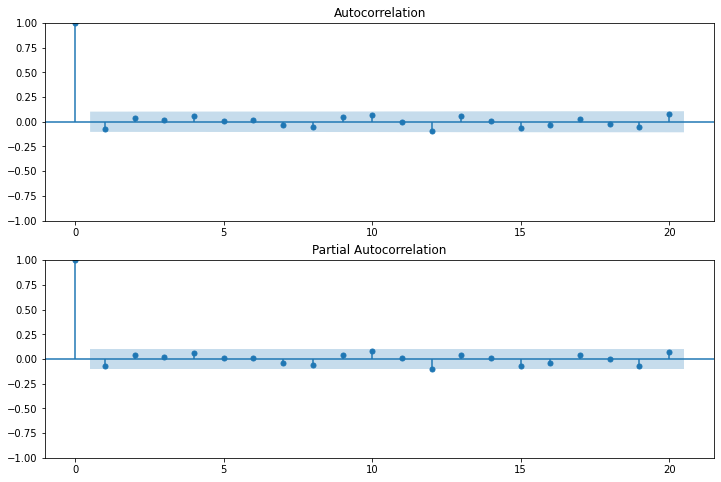

In [6]:
#ACF PACF

def autocorrelation(timeseries, lags):
    fig = plt.figure(figsize=(12, 8))
    ax1 = fig.add_subplot(211)
    sm.graphics.tsa.plot_acf(timeseries, lags=lags, ax=ax1)
    ax2 = fig.add_subplot(212)
    sm.graphics.tsa.plot_pacf(timeseries, lags=lags, ax=ax2)
    plt.show()


dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
stockPriceTrain = pd.read_csv('./stockPriceTrain.csv', parse_dates=['Time'],
                                 index_col='Time', date_parser=dateparse)

stockPriceTrainDiff = stockPriceTrain.diff(1)
stockPriceTrainDiff = stockPriceTrainDiff.fillna(0)

autocorrelation(stockPriceTrainDiff, 20)

/Users/saber/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:23: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


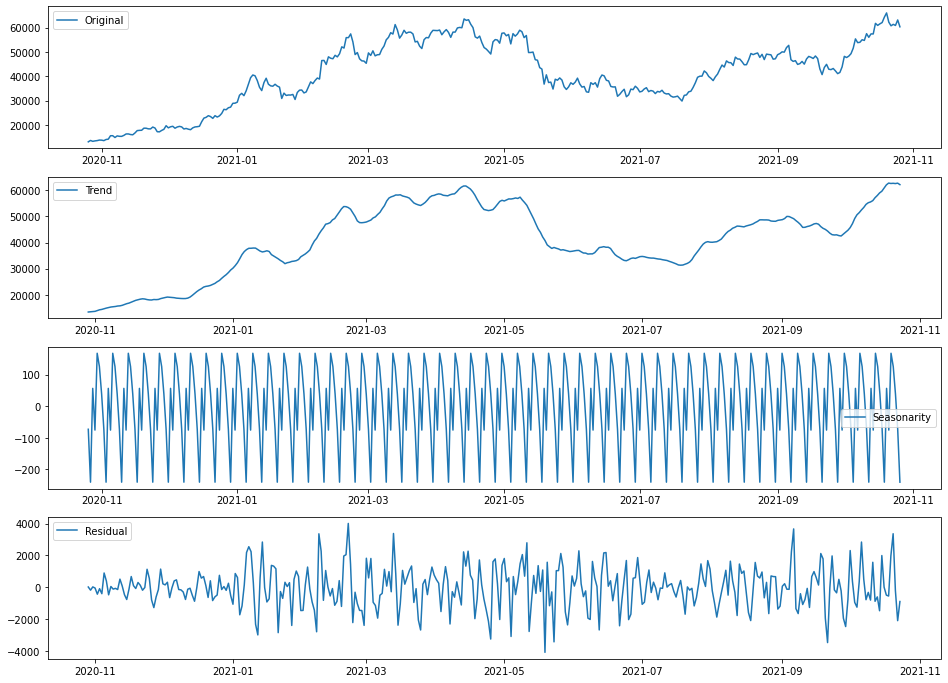

In [7]:
def decomposing(timeseries):
    decomposition = seasonal_decompose(timeseries)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    plt.figure(figsize=(16, 12))
    plt.subplot(411)
    plt.plot(timeseries, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal, label='Seasonarity')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residual')
    plt.legend(loc='best')
    plt.show()


dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
stockPriceTrain = pd.read_csv('./stockPriceTrain.csv', parse_dates=['Time'],
                                 index_col='Time', date_parser=dateparse)

decomposing(stockPriceTrain)

/Users/saber/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


timeseries_adf :  (-2.1265339645071704, 0.23397986038072893, 7, 358, {'1%': -3.448748905151901, '5%': -2.8696473721448728, '10%': -2.5710891239349585}, 6641.291186861231)
timeseries_diff1_adf :  (-1.8520262275094999, 0.3549548063478825, 6, 359, {'1%': -3.4486972813047574, '5%': -2.8696246923288418, '10%': -2.571077032068342}, 6642.806066193199)
timeseries_diff2_adf :  (-2.1223327445252993, 0.2356298230486772, 7, 358, {'1%': -3.448748905151901, '5%': -2.8696473721448728, '10%': -2.5710891239349585}, 6644.3239972250185)


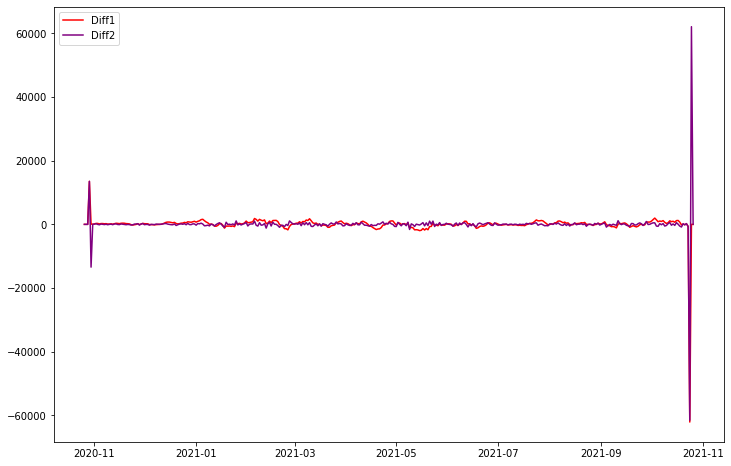

timeseries_adf :  (-10.787702192185582, 2.172822989280172e-19, 7, 358, {'1%': -3.448748905151901, '5%': -2.8696473721448728, '10%': -2.5710891239349585}, 5918.753650907233)
timeseries_diff1_adf :  (-9.444902664261422, 4.784580460994863e-16, 15, 350, {'1%': -3.4491725955218655, '5%': -2.8698334971428574, '10%': -2.5711883591836733}, 5966.191317471379)
timeseries_diff2_adf :  (-11.12002427857875, 3.484694343323079e-20, 16, 349, {'1%': -3.449226932880019, '5%': -2.869857365438656, '10%': -2.571201085130664}, 6034.363473719222)


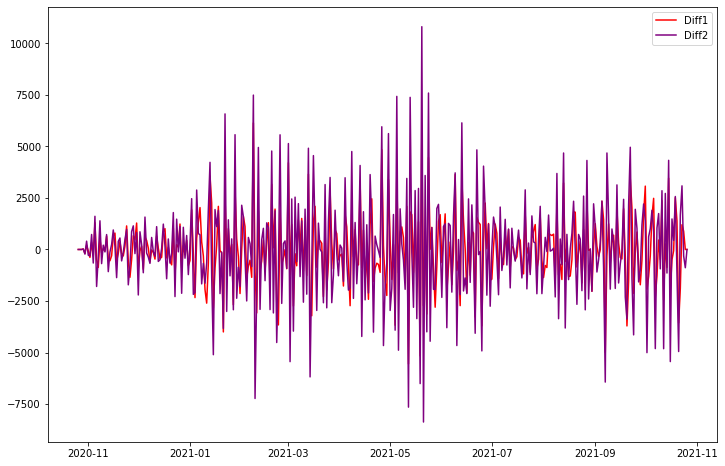

In [8]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
stockPriceTrain = pd.read_csv('./stockPriceTrain.csv', parse_dates=['Time'],
                                 index_col='Time', date_parser=dateparse)

decomposition = seasonal_decompose(stockPriceTrain,)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
trend = pd.DataFrame(trend)
trend.columns = ["Price"]

trend = trend.fillna(0)
seasonal = seasonal.fillna(0)
residual = residual.fillna(0)
residual = pd.DataFrame(residual)
residual.columns = ["Price"]


diff(trend)
diff(residual)

/Users/saber/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.
/Users/saber/Library/Python/3.7/lib/python/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


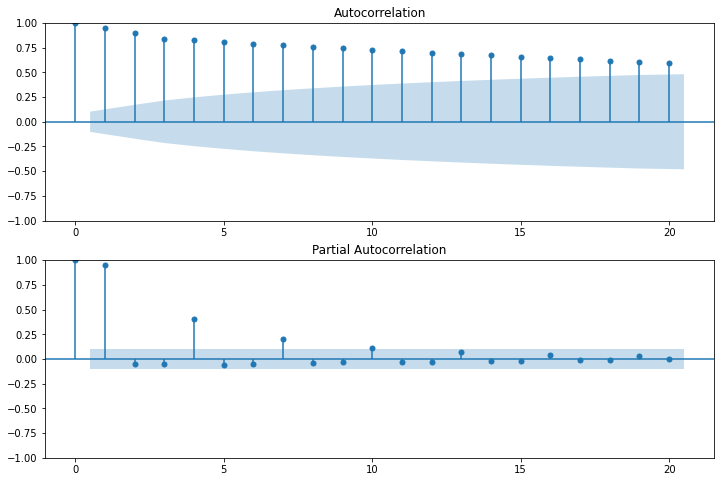

/Users/saber/Library/Python/3.7/lib/python/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


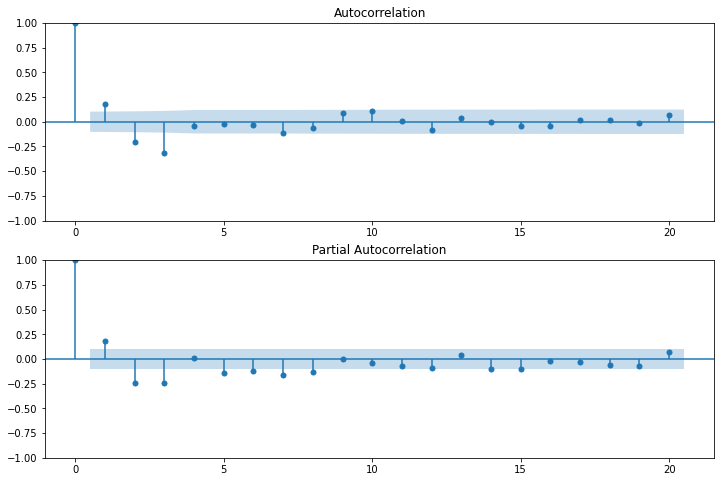

In [9]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
stockPriceTrain = pd.read_csv('./stockPriceTrain.csv', parse_dates=['Time'],
                                 index_col='Time', date_parser=dateparse)

decomposition = seasonal_decompose(stockPriceTrain)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

trend = trend.fillna(0)
seasonal = seasonal.fillna(0)
residual = residual.fillna(0)

autocorrelation(trend, 20)

autocorrelation(residual, 20)

In [10]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
stockPriceTrain = pd.read_csv('./stockPriceTrain.csv', parse_dates=['Time'],
                                 index_col='Time', date_parser=dateparse)
decomposition = seasonal_decompose(stockPriceTrain)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

trend = trend.fillna(0)
seasonal = seasonal.fillna(0)
residual = residual.fillna(0)

trend_evaluate = sm.tsa.arma_order_select_ic(trend, ic=['aic', 'bic'], trend='n', max_ar=4,
                                            max_ma=4)
print('trend AIC', trend_evaluate.aic_min_order)
print('trend BIC', trend_evaluate.bic_min_order)

residual_evaluate = sm.tsa.arma_order_select_ic(residual, ic=['aic', 'bic'], trend='n', max_ar=4,
                                            max_ma=4)
print('residual AIC', residual_evaluate.aic_min_order)
print('residual BIC', residual_evaluate.bic_min_order)


/Users/saber/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.
/Users/saber/Library/Python/3.7/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/saber/Library/Python/3.7/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/saber/Library/Python/3.7/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting M

trend AIC (2, 3)
trend BIC (1, 0)


/Users/saber/Library/Python/3.7/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/saber/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/saber/Library/Python/3.7/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/saber/Library/Python/3.7/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/saber/Library/Python/3.7/lib/pyt

residual AIC (1, 3)
residual BIC (1, 3)


/Users/saber/Library/Python/3.7/lib/python/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


/Users/saber/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  
/Users/saber/Library/Python/3.7/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/saber/Library/Python/3.7/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/saber/Library/Python/3.7/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/saber/Library/Python/3.7/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting 

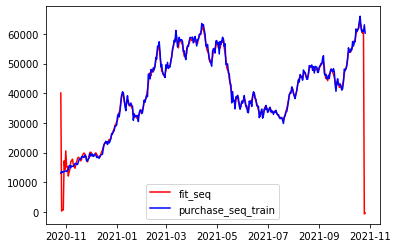

/Users/saber/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:55: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


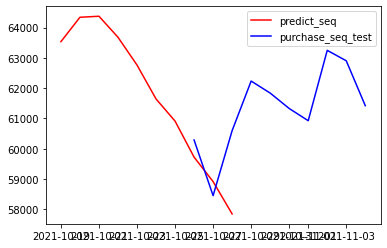

In [11]:
import statsmodels.api as sm

def ARIMA_Model(timeseries, order):
    model = sm.tsa.ARIMA(timeseries, order=order)
    return model.fit()


dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
stockPriceTrain = pd.read_csv('./stockPriceTrain.csv', parse_dates=['Time'],
                                 index_col='Time', date_parser=dateparse)

stockPriceTest = pd.read_csv('./stockPriceTest.csv', parse_dates=['Time'],
                                index_col='Time', date_parser=dateparse)


decomposition = seasonal_decompose(stockPriceTrain)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

trend = trend.fillna(0)
seasonal = seasonal.fillna(0)
residual = residual.fillna(0)


trend_model = ARIMA_Model(trend, (2, 0, 3))
trend_fit_seq = trend_model.fittedvalues
trend_predict_seq = trend_model.predict(start='2021-10-19', end='2021-10-28', dynamic=True)

# r_error
residual_model = ARIMA_Model(residual, (1, 0, 3))
residual_fit_seq = residual_model.fittedvalues
residual_predict_seq = residual_model.predict(start='2021-10-19', end='2021-10-28', dynamic=True)

# fit
fit_seq = pd.Series(seasonal.values, index=seasonal.index)
fit_seq = fit_seq.add(trend_fit_seq, fill_value=0)
fit_seq = fit_seq.add(residual_fit_seq, fill_value=0)


plt.plot(fit_seq, color='red', label='fit_seq')
plt.plot(stockPriceTrain, color='blue', label='purchase_seq_train')
plt.legend(loc='best')
plt.show()


# predict train

seasonal_predict_seq = seasonal['2021-8-19':'2021-8-28']



predict_dates = pd.Series(
    ['2021-10-19', '2021-10-20', '2021-10-21', '2021-10-22', '2021-10-23', '2021-10-24', '2021-10-25',
     '2021-10-26', '2021-10-27','2021-10-28']).apply(lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d'))

seasonal_predict_seq.index = predict_dates

predict_seq = pd.Series(seasonal_predict_seq.values, index=seasonal_predict_seq.index)
predict_seq = predict_seq.add(trend_predict_seq, fill_value=0)
predict_seq = predict_seq.add(residual_predict_seq, fill_value=0)


plt.plot(predict_seq, color='red', label='predict_seq')
plt.plot(stockPriceTest, color='blue', label='purchase_seq_test')
plt.legend(loc='best')
plt.show()






2021-11-01    60420.410035
2021-11-02    60428.138218
2021-11-03    60423.692196
2021-11-04    60426.249992
2021-11-05    60424.778492
2021-11-06    60425.625046
2021-11-07    60425.138024
2021-11-08    60425.418207
2021-11-09    60425.257018
2021-11-10    60425.349750
2021-11-11    60425.296401
2021-11-12    60425.327093
2021-11-13    60425.309436
2021-11-14    60425.319594
2021-11-15    60425.313750
2021-11-16    60425.317112
2021-11-17    60425.315178
2021-11-18    60425.316290
2021-11-19    60425.315650
2021-11-20    60425.316019
2021-11-21    60425.315807
2021-11-22    60425.315929
2021-11-23    60425.315858
2021-11-24    60425.315899
2021-11-25    60425.315876
2021-11-26    60425.315889
2021-11-27    60425.315881
2021-11-28    60425.315886
2021-11-29    60425.315883
2021-11-30    60425.315885
2021-12-01    60425.315884
2021-12-02    60425.315884
2021-12-03    60425.315884
2021-12-04    60425.315884
Freq: D, Name: predicted_mean, dtype: float64


/Users/saber/Library/Python/3.7/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/saber/Library/Python/3.7/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/saber/Library/Python/3.7/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/saber/Library/Python/3.7/lib/python/site-packages/statsmodels/tsa/statespace/kalman_filter.py:2292: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


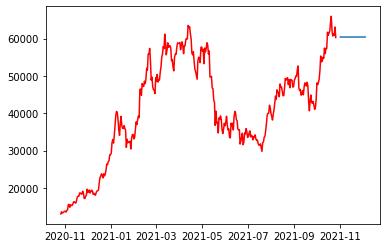

In [15]:
Model = sm.tsa.ARIMA(stockPriceTrain,order = (1,1,1))


result= Model.fit()

a = result.predict('20211101','20211204',dynamic = True, typ = 'levels')

print(a)

plt.plot(stockPriceTrain,color = "red" ,label = "real")
plt.plot(a,label = "Predict")